In [6]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 61.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

In [1]:
from tensorflow.keras.models import load_model

# Load the models
pneumonia_model = load_model('pneumonia.h5')
tuberculosis_model = load_model('tuberculosis.h5')


In [2]:
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras.models import Model

# Define the input shape based on one of the models
input_shape = pneumonia_model.input_shape[1:]  # Assuming both models have the same input shape

# Define the input layer
input_layer = Input(shape=input_shape)

# Get the predictions from each model
pneumonia_pred = pneumonia_model(input_layer)
tuberculosis_pred = tuberculosis_model(input_layer)

# Concatenate the outputs of both models
combined_pred = Concatenate()([pneumonia_pred, tuberculosis_pred])

# Define a Dense layer for the final classification
output = Dense(3, activation='softmax')(combined_pred)

# Define the final model
combined_model = Model(inputs=input_layer, outputs=output)


In [3]:
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image size and batch size
image_size = (128, 128)  # Adjust this size to match what your models expect
batch_size = 32

# Create an ImageDataGenerator for training and validation
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)  # 20% for validation

# Load training data
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Final Project/Datasets/Prem/Test',                # Path to dataset directory
    target_size=image_size,   # Resize images to the size expected by the model
    batch_size=batch_size,
    class_mode='categorical', # 3 classes: Pneumonia, Tuberculosis, Normal
    subset='training'
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Final Project/Datasets/Prem/Test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 981 images belonging to 3 classes.
Found 245 images belonging to 3 classes.


In [5]:
combined_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 208s 7s/step - accuracy: 0.4039 - loss: 1.0843 - val_accuracy: 0.4082 - val_loss: 0.9900
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.4370 - loss: 0.9775 - val_accuracy: 0.6571 - val_loss: 0.9302
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - accuracy: 0.6813 - loss: 0.8718 - val_accuracy: 0.8653 - val_loss: 0.8135
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.8358 - loss: 0.8078 - val_accuracy: 0.8653 - val_loss: 0.7942
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.8636 - loss: 0.8035 - val_accuracy: 0.8408 - val_loss: 0.8010
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.8963 - loss: 0.7870 - val_accuracy: 0.8204 - val_loss: 0.7777
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.9247 - loss: 0.7410 - val_accuracy: 0.8653 - val_loss: 0.7715
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.9366 - loss: 0.7222 - val_accuracy: 0.8082 - v

In [6]:
#print the final training accuracy
final_loss, final_accuracy = combined_model.evaluate(validation_generator)
print(f"Final Training Accuracy: {final_accuracy * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9190 - loss: 0.7028
Final Training Accuracy: 89.39%


In [8]:
# Save the entire model
combined_model.save('Project.h5')
print("Model saved successfully!")

Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


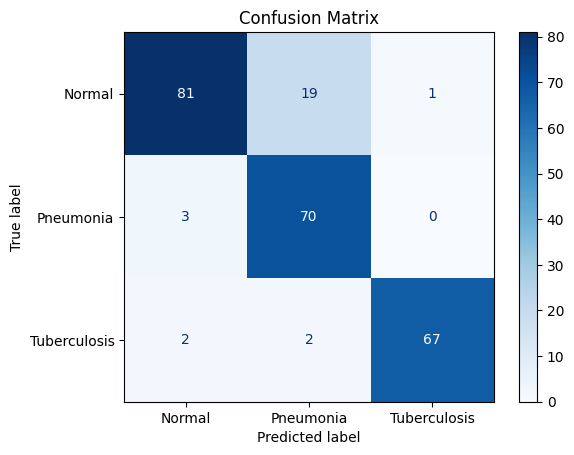

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get the ground truth labels and predicted labels for the validation set
# Since the generator provides data in batches, we loop through it to get all predictions and labels
true_labels = []
predictions = []

for images, labels in validation_generator:
    # Predict on the batch of images
    preds = combined_model.predict(images)

    # Append the true labels and predicted labels
    true_labels.extend(np.argmax(labels, axis=1))  # Get class indices from one-hot encoded labels
    predictions.extend(np.argmax(preds, axis=1))   # Get predicted class indices

    # Break loop after going through the whole validation set
    if len(true_labels) >= validation_generator.samples:
        break

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predictions = np.array(predictions)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Display the confusion matrix with labels
class_names = list(validation_generator.class_indices.keys())  # ["Normal", "Pneumonia", "Tuberculosis"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [10]:
from sklearn.metrics import classification_report

report = classification_report(true_labels, predictions, target_names=class_names)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Normal       0.94      0.80      0.87       101
   Pneumonia       0.77      0.96      0.85        73
Tuberculosis       0.99      0.94      0.96        71

    accuracy                           0.89       245
   macro avg       0.90      0.90      0.89       245
weighted avg       0.90      0.89      0.89       245



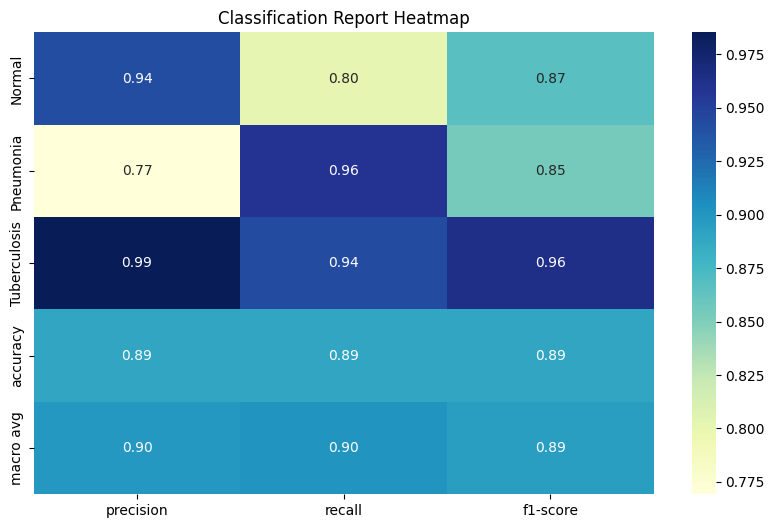

In [11]:
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Generate the classification report as a dictionary
report = classification_report(true_labels, predictions, target_names=class_names, output_dict=True)

# Convert the dictionary to a DataFrame for easier plotting
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")  # Exclude the 'accuracy' row and the support column for a cleaner plot
plt.title("Classification Report Heatmap")
plt.show()


In [44]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def predict_image(image_path, model, class_names):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(128, 128))  # Use the input size expected by your model
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1] if model was trained with normalized data
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = predictions[0][predicted_class]

    # Print the predicted class and confidence
    print(f"Predicted class: {class_names[predicted_class]}")

# Define class names based on your model's output order
class_names = ["Normal", "Pneumonia", "Tuberculosis"]

# Example usage: predict an image
predict_image("/content/drive/MyDrive/Final Project/Datasets/Prem/Train/pneumonia/person1005_bacteria_2936.jpeg", combined_model, class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted class: Pneumonia
